<a href="https://colab.research.google.com/github/JNailantei/Mammal-Classification/blob/main/Vertebrae_classification_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
vertebrate_df = pd.read_csv('/content/vertebrate(4).csv')

In [ ]:
vertebrate_df.head()

,Name,Warm-blooded,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates,Class
0,human,1,1,0,0,1,0,mammals
1,python,0,0,0,0,0,1,reptiles
2,salmon,0,0,1,0,0,0,fishes
3,whale,1,1,1,0,0,0,mammals
4,frog,0,0,1,0,1,1,amphibians


In [ ]:
vertebrate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Name              15 non-null     object
 1   Warm-blooded      15 non-null     int64 
 2   Gives Birth       15 non-null     int64 
 3   Aquatic Creature  15 non-null     int64 
 4   Aerial Creature   15 non-null     int64 
 5   Has Legs          15 non-null     int64 
 6   Hibernates        15 non-null     int64 
 7   Class             15 non-null     object
dtypes: int64(6), object(2)
memory usage: 1.1+ KB


In [ ]:
# Separate features and target variable
X = vertebrate_df.drop(columns=['Class', 'Name'])
y = vertebrate_df['Class']


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the classifier
clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)


Accuracy: 0.6666666666666666
Classification Report:
               precision    recall  f1-score   support

       birds       1.00      1.00      1.00         1
      fishes       0.00      0.00      0.00         1
     mammals       0.50      1.00      0.67         1

    accuracy                           0.67         3
   macro avg       0.50      0.67      0.56         3
weighted avg       0.50      0.67      0.56         3



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


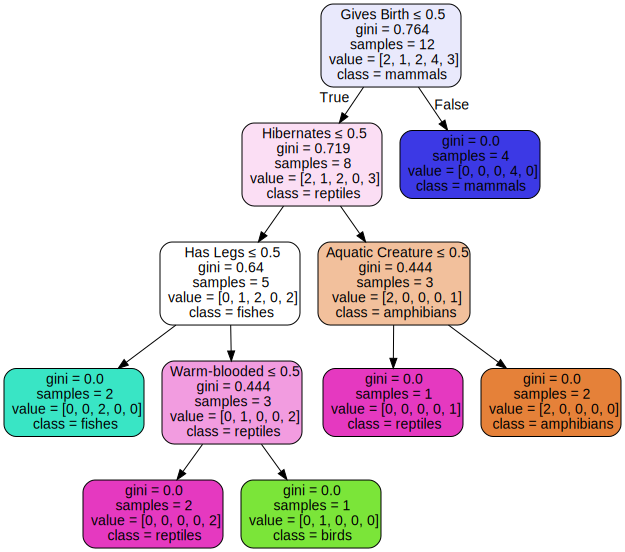

In [ ]:
!apt-get install -y graphviz
!pip install graphviz
from sklearn.tree import export_graphviz
import graphviz
unique_classes = sorted(y.unique())
class_names = [str(cls) for cls in unique_classes]
# Export the tree as a DOT file
dot_data = export_graphviz(clf, out_file=None,
                           feature_names=X.columns,
                           class_names=class_names,
                           filled=True, rounded=True,
                           special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("vertebrate_tree")  # Save the tree as a file
graph  # Display the tree
